In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Task : 1. Exploratory Data Analysis (EDA):**

**Perform exploratory data analysis to understand the structure of the dataset.**

In [99]:
df= pd.read_excel("/content/glass.xlsx")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [101]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**Check for missing values, outliers, inconsistencies in the data.**

In [102]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [103]:
print("Unique values in 'Type' column:")
print(df['Type'].unique())

Unique values in 'Type' column:
[1 2 3 5 6 7]


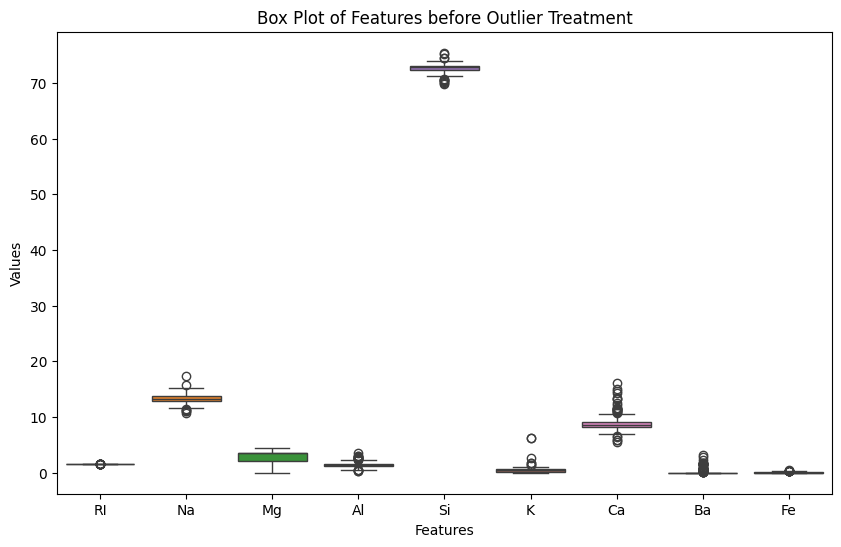

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box Plot of Features before Outlier Treatment')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [105]:
for col in df.columns[:-1]:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3-q1
  upper_bound=q3+1.5*IQR
  lower_bound=q1-1.5*IQR
  df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
  df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
print("Outlier Treated")

Outlier Treated


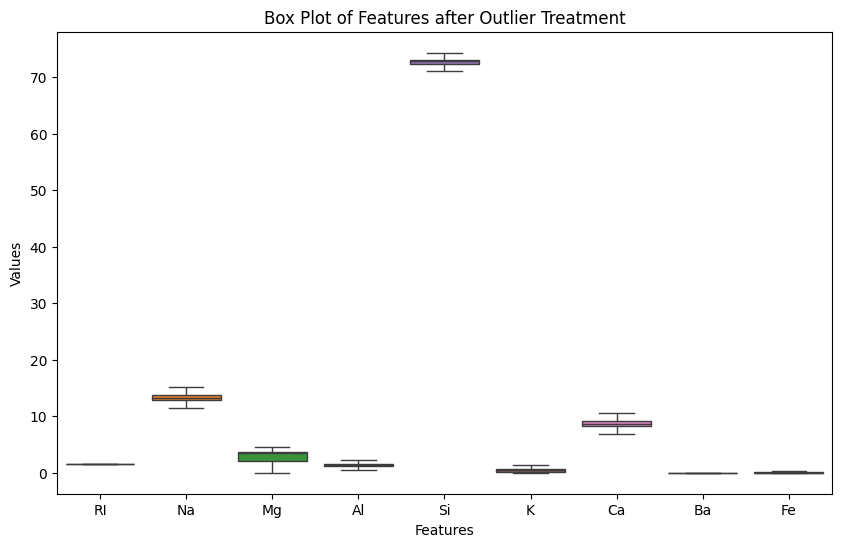

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box Plot of Features after Outlier Treatment')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# **Task : 2. Data Visualization:**

**Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.**

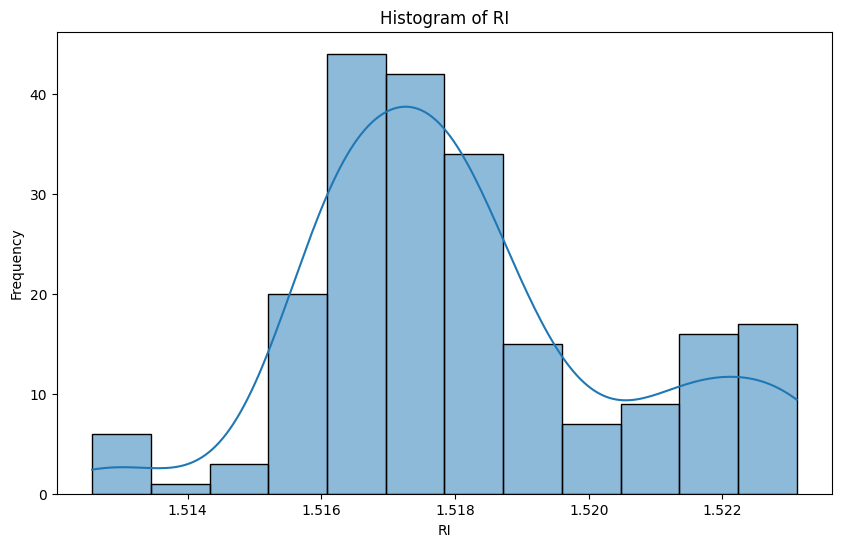

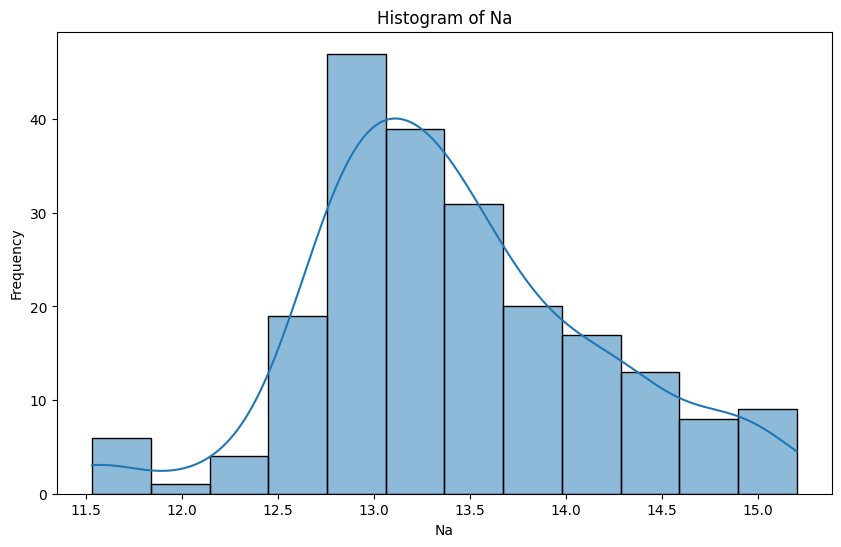

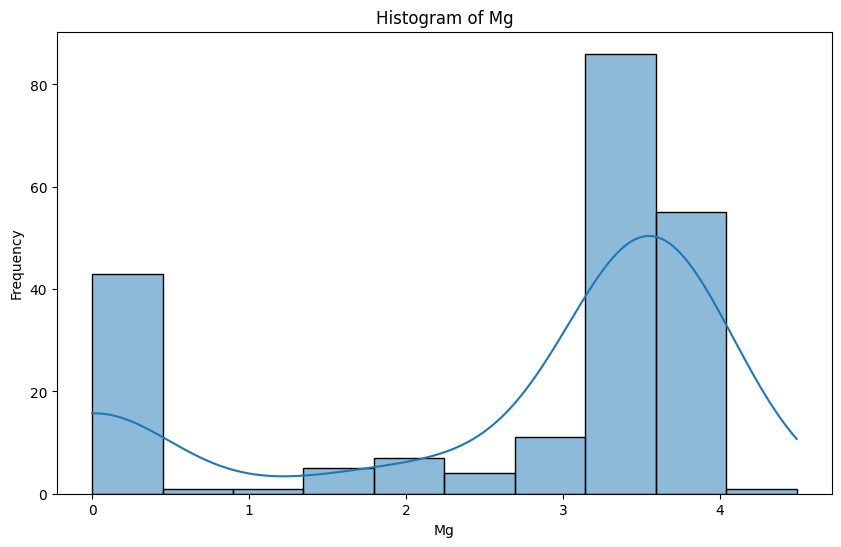

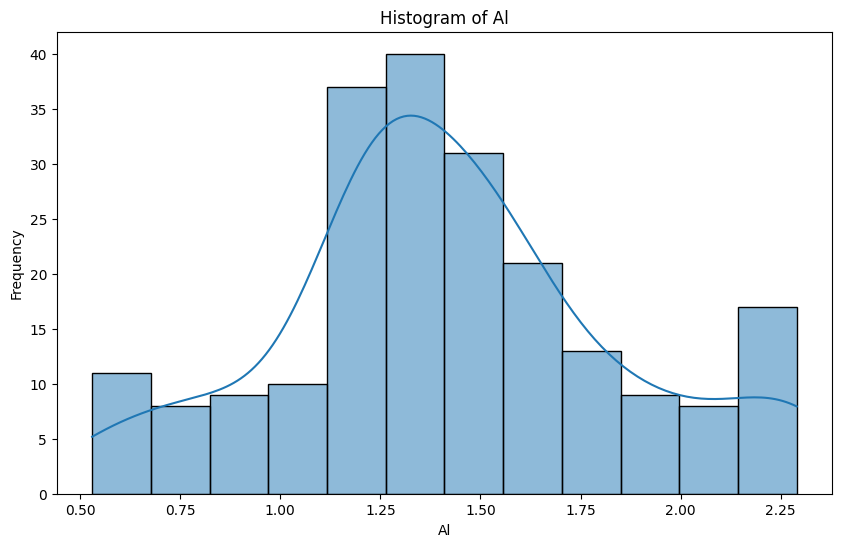

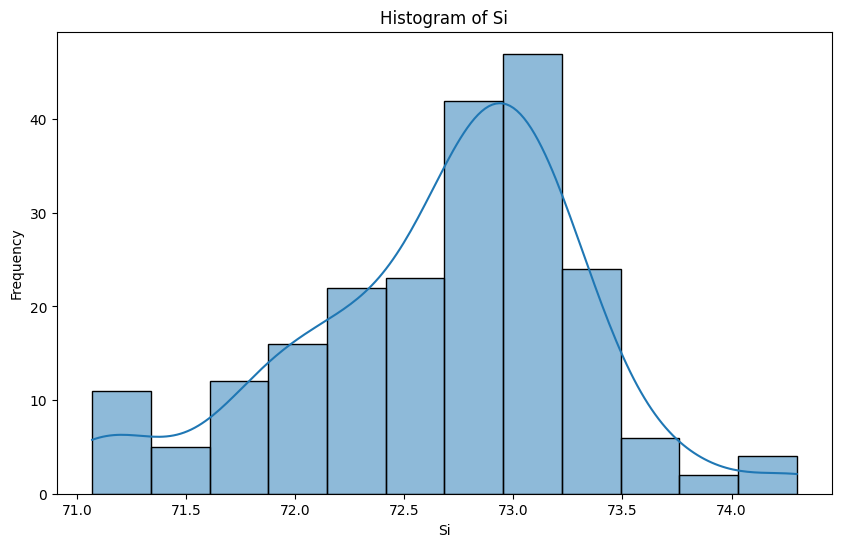

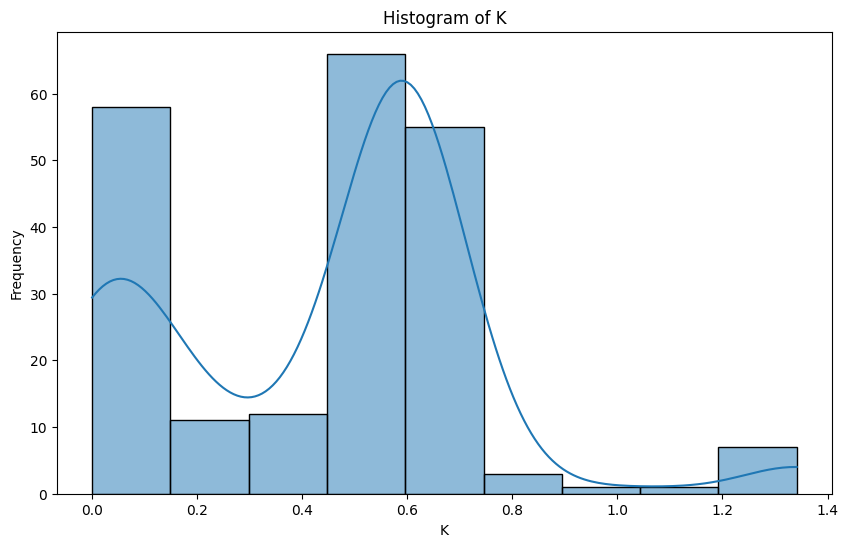

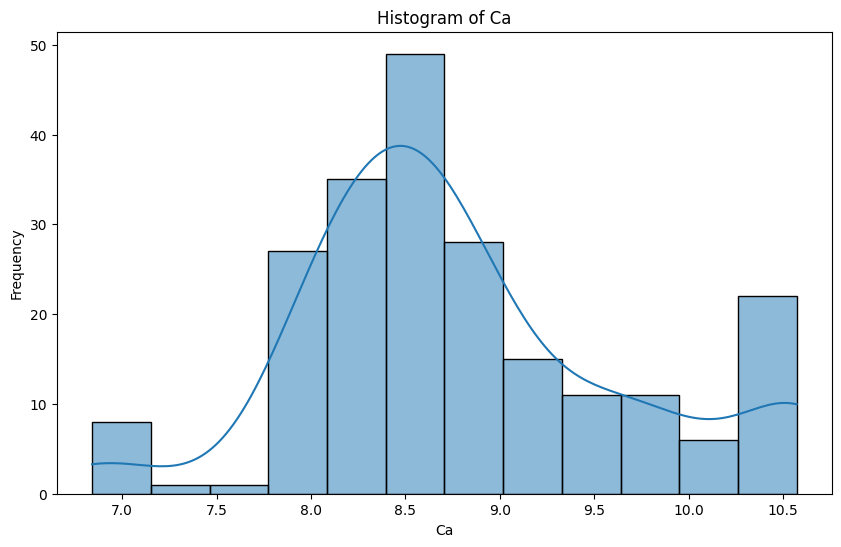

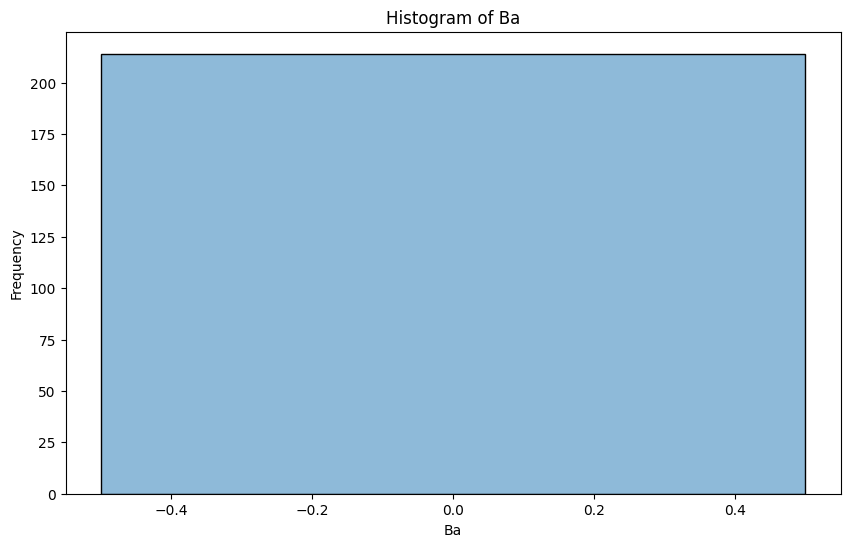

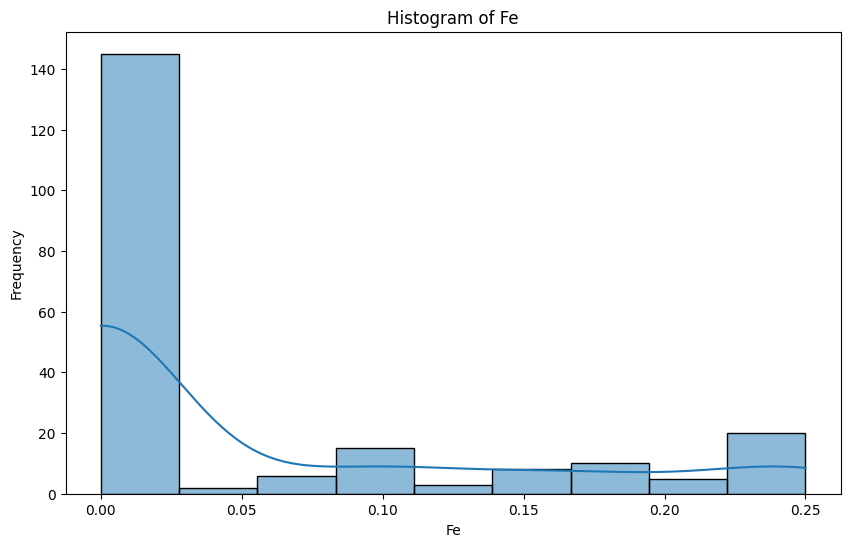

In [107]:
# Histogram of numerical features
columns = df.columns[:-1]
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

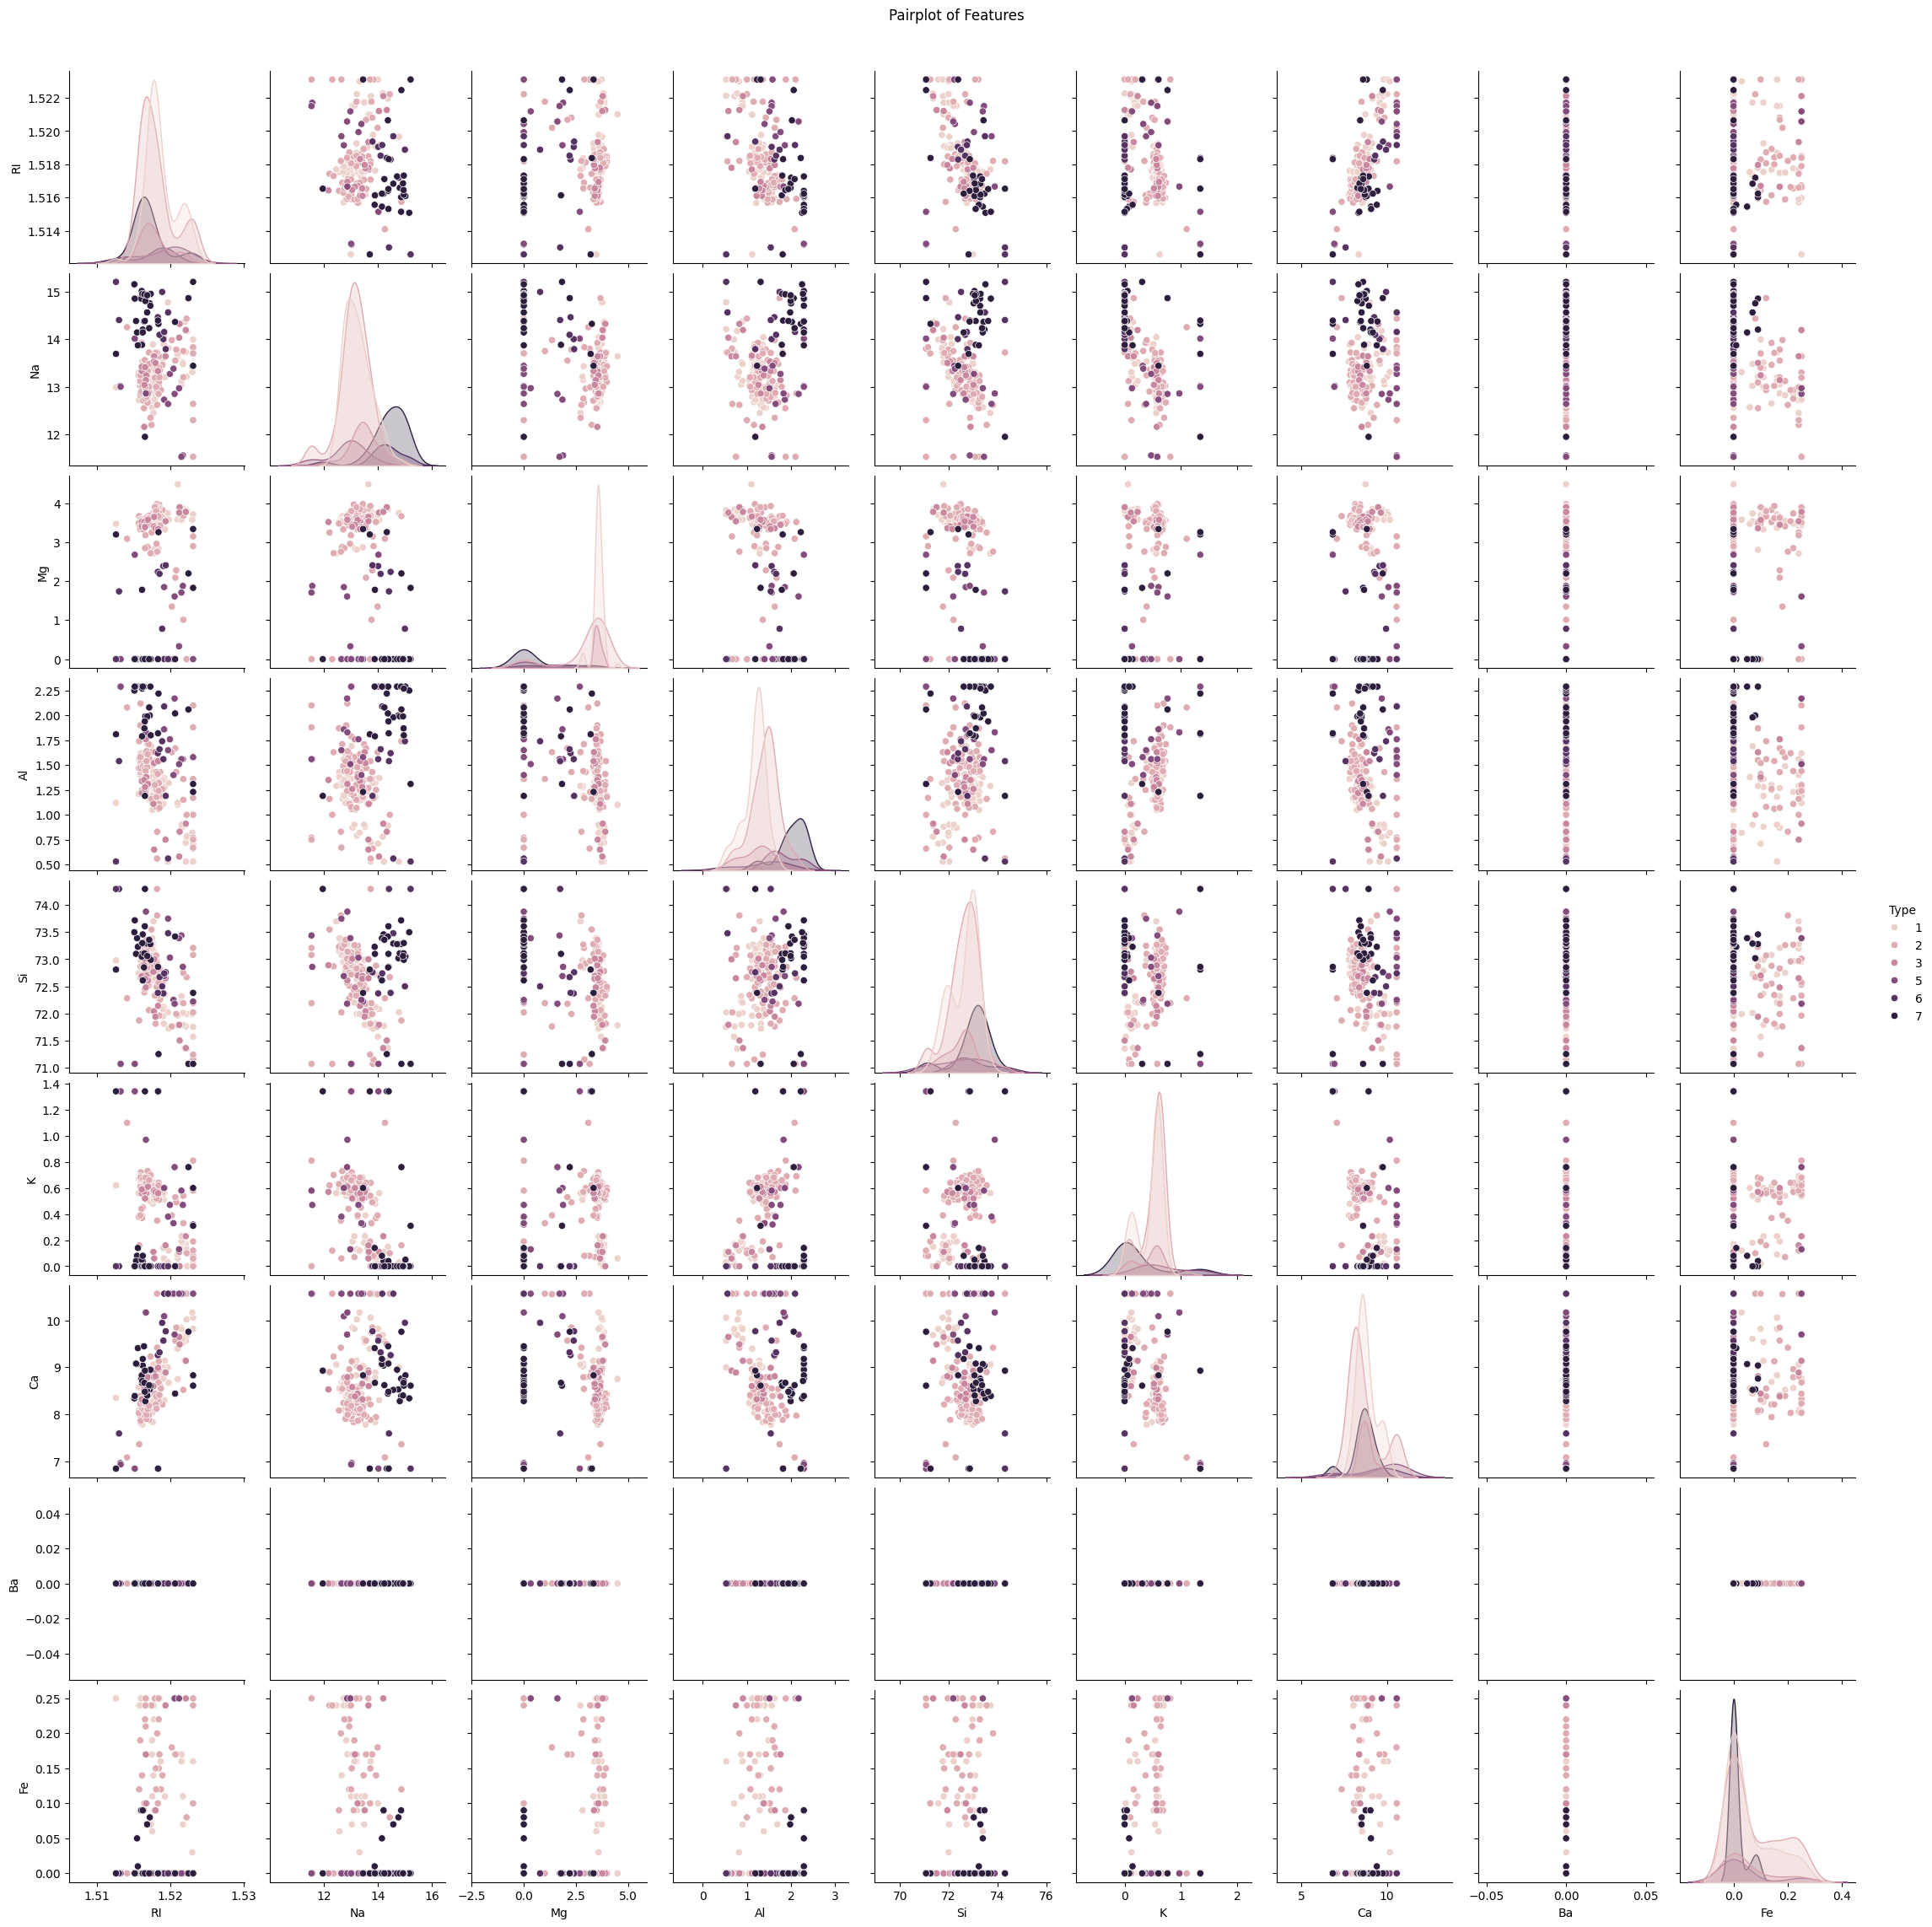

In [108]:
# Pairplot to visualize the relationship between features
sns.pairplot(data=df, hue='Type')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

**Analyze any patterns or correlations observed in the data.**

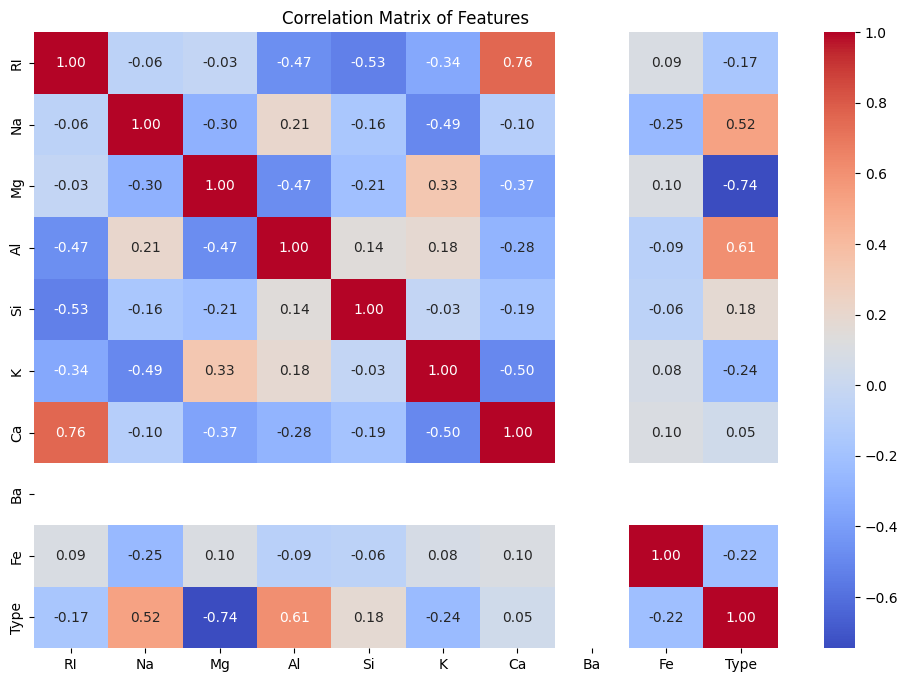

In [109]:
# Pattern or correlation observed in data
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **Task : 3. Data Preprocessing**

**1. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.**

In [110]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
x = df.drop('Type', axis=1)
y = df['Type']

# Apply Standardization
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

# Convert scaled data back to a DataFrame (optional, but good for readability)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

print("Original features head:")
display(x.head())

print("\nScaled features head:")
display(x_scaled_df.head())

# Check for class imbalance
print("\nValue counts for 'Type' column:")
display(y.value_counts())

Original features head:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0



Scaled features head:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091



Value counts for 'Type' column:


,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


# **Task : 4. Random Forest Model Implementation**

**1. Divide the data into train and test split.**

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

**2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.**

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
print("Random Forest model trained successfully!")
rf_model.score(x_test, y_test)*100, rf_model.score(x_train, y_train)*100

Random Forest model trained successfully!


(76.74418604651163, 100.0)

**3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.**

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model (assuming rf_model is already initialized)
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# For precision, recall, and f1-score, we need to specify average for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7674
Precision: 0.7798
Recall: 0.7674
F1-score: 0.7645


# **Task : 5. Bagging and Boosting Methods**

**Apply the Bagging and Boosting methods and compare the results.**

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement Bagging using the trained Random Forest model as the base estimator
bagging_model = BaggingClassifier(estimator=rf_model, random_state=42, n_estimators=50)

# Train the Bagging model
bagging_model.fit(x_train, y_train)

print("Bagging model trained successfully!")

# Make predictions on the test set using the Bagging model
y_pred_bagging = bagging_model.predict(x_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Model Performance:")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"Precision: {precision_bagging:.4f}")
print(f"Recall: {recall_bagging:.4f}")
print(f"F1-score: {f1_bagging:.4f}")

Bagging model trained successfully!
Bagging Model Performance:
Accuracy: 0.7442
Precision: 0.7558
Recall: 0.7442
F1-score: 0.7433


In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement AdaBoost classifier
adaboost_model = AdaBoostClassifier(estimator=rf_model, random_state=42, n_estimators=100) # Using Random Forest as base estimator for demonstration

# Train the AdaBoost model
adaboost_model.fit(x_train, y_train)

print("AdaBoost model trained successfully!")

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(x_test)

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print("\nAdaBoost Model Performance:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1-score: {f1_adaboost:.4f}")

AdaBoost model trained successfully!

AdaBoost Model Performance:
Accuracy: 0.7674
Precision: 0.7742
Recall: 0.7674
F1-score: 0.7614


# **Additional Notes**

**1. Explain Bagging and Boosting methods. How is it different from each other.**

Bagging and Boosting are both ensemble learning techniques that combine the predictions of multiple base models to improve overall performance and reduce variance or bias.

**Bagging (Bootstrap Aggregating)**:
* Concept: Bagging involves training multiple instances of the same base learning algorithm on different bootstrap samples of the training data. Bootstrap samples are created by randomly sampling the original dataset with replacement.
* How it works: Each base model is trained independently on its respective bootstrap sample. For classification, the final prediction is typically made by taking a majority vote of the predictions from all base models. For regression, the average of the predictions is taken.
* Goal: The primary goal of bagging is to reduce the variance of the model. By training on different subsets of the data, the base models are less correlated, and their combined predictions tend to be more stable and less sensitive to noise in the data.
* Examples: Random Forest is a popular bagging algorithm that uses decision trees as base estimators.

**Boosting**:

* Concept: Boosting is an iterative ensemble method where each subsequent base model is trained to correct the errors of the previous models. It focuses on misclassified instances (in classification) or instances with large errors (in regression).
* How it works: Models are trained sequentially. Each new model gives more weight to the instances that were misclassified or poorly predicted by the previous models. The final prediction is a weighted sum of the predictions from all base models, where models that performed better on the difficult instances are given higher weights.
* Goal: The primary goal of boosting is to reduce the bias of the model and improve its accuracy. By focusing on difficult instances, boosting algorithms can learn more complex patterns in the data.
* Examples: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, and LightGBM are popular boosting algorithms.

Key Differences between Bagging and Boosting:

Bagging
* Training	Parallel (models trained independently)
* Data Sampling	Bootstrap samples (sampling with replacement)
* Focus on	reducing variance
* Weighting	Equal weighting of base models (usually)
* Impact of Errors of base models don't directly influence subsequent models

Boosting
* Training	Sequential (models trained iteratively)
* Data Sampling	Weighted samples (weights adjusted based on errors)
* Focus	on Reducing bias and improving accuracy
* Weighted combination of base models
* Base Models	Typically uses weak learners
* Impact of Errors of previous models heavily influence subsequent models

In summary, Bagging builds multiple models in parallel on different data subsets to reduce variance, while Boosting builds models sequentially, with each model trying to correct the errors of the previous ones to reduce bias.

# **2. Explain how to handle imbalance in the data.**

Imbalanced data occurs when the number of observations in one class is significantly lower than the number of instances in other classes. This can pose a challenge for machine learning models, as they might become biased towards the majority class and perform poorly in predicting the minority class.

Here are several techniques to handle imbalanced data:

1) Resampling Techniques:
* Oversampling the minority class: This involves increasing the number of instances in the minority class to balance the dataset. Common oversampling techniques include:

* a) Random Oversampling: Duplicating random instances of the minority class.
* b) SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic instances of the minority class by interpolating between existing minority class instances.
* c) ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE, but it focuses on generating synthetic data for minority instances that are harder to learn.
* Undersampling the majority class: This involves decreasing the number of instances in the majority class to balance the dataset. Common undersampling techniques include:
* a) Random Undersampling: Removing random instances of the majority class.
* b) NearMiss: Selecting majority class instances that are closest to minority class instances.

2. Using Different Evaluation Metrics:

When dealing with imbalanced data, accuracy can be a misleading metric. It's important to use evaluation metrics that are less sensitive to class distribution, such as:
* Precision: The ratio of true positives to the sum of true positives and false positives.
* Recall (Sensitivity): The ratio of true positives to the sum of true positives and false negatives.
* F1-score: The harmonic mean of precision and recall.
* AUC-ROC Curve: Measures the ability of a classifier to distinguish between classes.

3. Using Algorithms Less Sensitive to Class Imbalance:

Some machine learning algorithms are inherently less affected by imbalanced data, such as:

* Decision Trees
* Random Forests
* Gradient Boosting Machines (e.g., AdaBoost, XGBoost, LightGBM)

4. Adjusting Class Weights:

Many machine learning algorithms allow you to assign different weights to the classes during training. By assigning higher weights to the minority class, the model is penalized more heavily for misclassifying minority instances, encouraging it to pay more attention to the minority class.

5. Anomaly Detection:

In some cases, imbalanced data can be treated as an anomaly detection problem, where the minority class is considered as anomalies.

The choice of technique depends on the specific dataset, the degree of imbalance, and the chosen machine learning algorithm. It's often recommended to try multiple techniques and evaluate their impact on model performance using appropriate metrics.